# 5. Geometric transformation - 기하학적 변환

## 1) Translation transformation and Shear transformation of the image - 영상의 이동 변환과 전단 변환

<hr>

### Translation transformation - 이동 변환
<hr>

- 영상의 기하학적 변환(geometric transformation)이란
    - 영상을 구성하는 픽셀의 배치 구조를 변경함으로써 전체 영상의 모양을 비꾸는 작업이다.
    - image registration, removal of geometric distortion, etc.
<hr>

- 이동 변환(Translation transformation)
    - 가로 또는 세로 방향으로 영삳을 특정 크기만큼 이동시키는 변환
    - x축과 y축 방향으로의 이동 변위를 지정한다.
<hr>

> `영상의 어파인 변환 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}warpAffine}(src, M, dsize, dst={\color{green}None}, flags, borderMode, borderValue) -> dst}$$
- src : source. 입력 영상
- M : Matrix. `2x3 어파인 변환 행렬. 실수형`
- dsize : destination size. 결과 영상 크기. (w, h) 튜플. `(0, 0)`이면 src와 같은 크기로 설정.
- dst : destination. 출력 영상
- flags : 보간법. 기본값은 cv2.INTER_LINEAR
- borderMode : 가장자리 픽셀 확장 방식. 기본값은 cv2.BORDER_CONSTANT(0으로 확장)
- borderValue : cv2.BORDER_CONSTANT일 때 사용할 상수 값. 기본값은 0

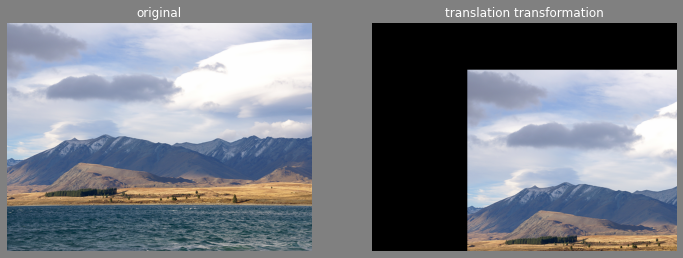

In [8]:
### Practice translation transformation of image
import cv2
import matplotlib.pyplot as plt
import numpy as np

from opencv_supports import *

source = load_image("tekapo.bmp")

affine_matrix = np.array([[1, 0, 200], [0, 1, 100]], dtype=np.float32)

destination = cv2.warpAffine(source, affine_matrix, (0, 0))

## Output with pyplot
plt.figure(figsize=(12, 6), facecolor="gray")

plt.subplot(121, title="original").axis("off")
plt.imshow(source[:,:,::-1])

plt.subplot(122, title="translation transformation").axis("off")
plt.imshow(destination[:,:,::-1])

plt.show()

## Output with opencv window
cv2.imshow("original", source)
cv2.imshow("translation transformation", destination)

close_opencv_window_for_macOS()

<hr>

### Shear Transformation - 전단 변환
<hr>

- 층 밀림 변환. x축과 y축 방향에 대해 따로 정의한다.

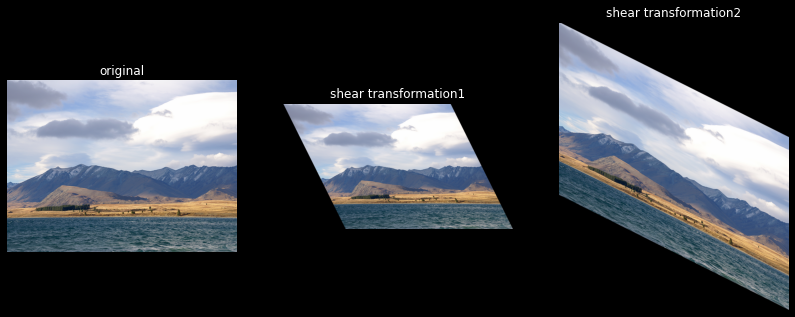

In [5]:
### Practice shear transformation of image
import cv2
import matplotlib.pyplot as plt
import numpy as np

from opencv_supports import *

source = load_image("tekapo.bmp")

height, width = source.shape[:2]

affine_matrix = np.array([[1, 0.5, 0], [0, 1, 0]], dtype=np.float32)
affine_matrix2 = np.array([[1, 0, 0], [0.5, 1, 0]], dtype=np.float32)

destination = cv2.warpAffine(source, affine_matrix, (width + int(height * 0.5), height))
destination2 = cv2.warpAffine(source, affine_matrix2, (width, height + int(width * 0.5)))

## Output with pyplot
plt.figure(figsize=(14, 6))

plt.subplot(131, title="original").axis("off")
plt.imshow(source[:,:,::-1])

plt.subplot(132, title="shear transformation1").axis("off")
plt.imshow(destination[:,:,::-1])

plt.subplot(133, title="shear transformation2").axis("off")
plt.imshow(destination2[:,:,::-1])

plt.show()

## Output with opencv window
cv2.imshow("original", source)
cv2.imshow("shear transformation1", destination)
cv2.imshow("shear transformation2", destination2)

close_opencv_window_for_macOS()